<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>1.BASIC STATISTICS</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset</b></u>
</div>

<div style="text-align: left; font-size: 25px; color: red;">
    <u><b>IMPORTING LIBRARIES</b></u>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align: left; font-size: 25px; color: red;">
    <u><b>LOADING DATABASE</b></u>
</div>

In [2]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [3]:
numerical_cols=df.select_dtypes(include=['float64','int64']).columns

DISPLAY FEATURES PROPERTIES OF DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


STATISTICAL SUMMARY OF DATA

In [5]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


DISPLAY ALL COLUMN NAMES

In [6]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

<div style="text-align: left; font-size: 25px; color: red;">
    <u><b>DATA VISUALIZATION</b></u>
</div>

●	Boxplots for numerical variables


Date


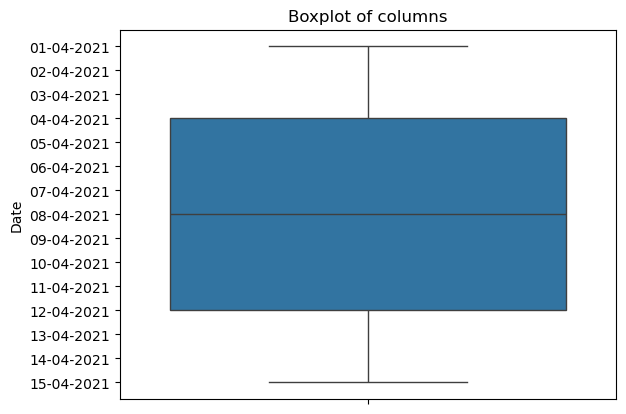

Day


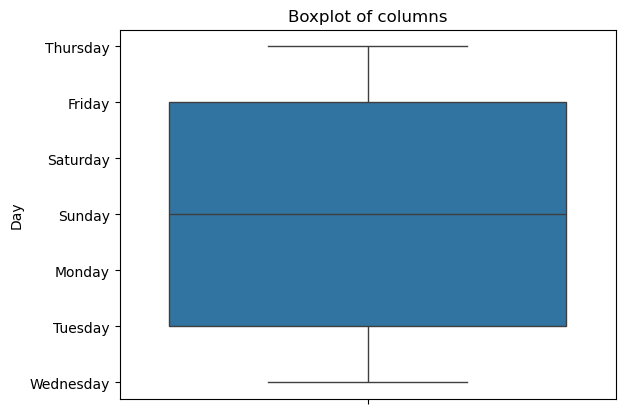

SKU


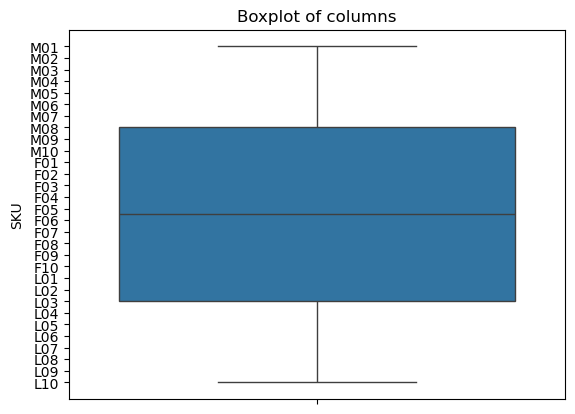

City


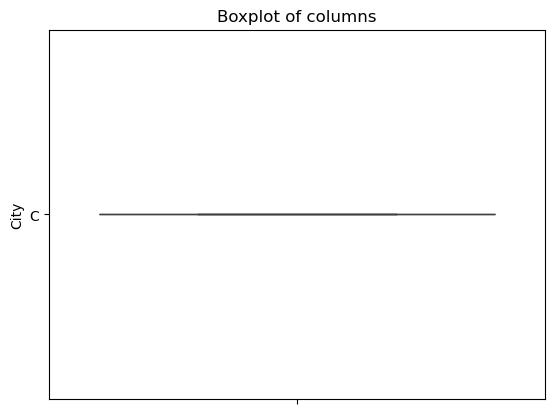

Volume


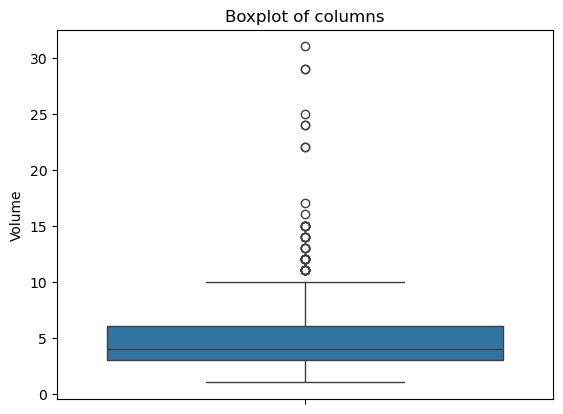

BU


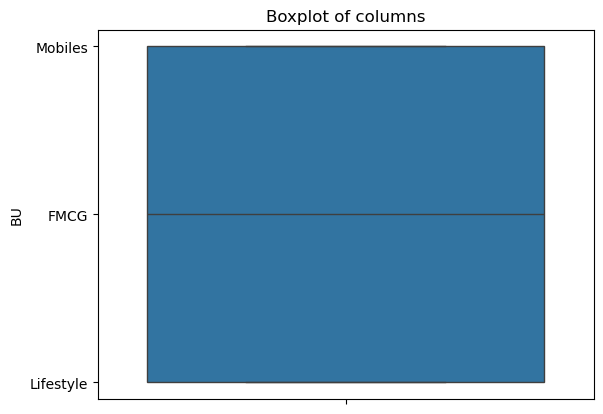

Brand


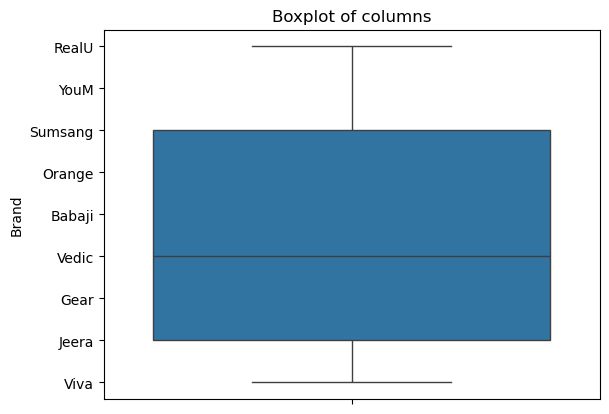

Model


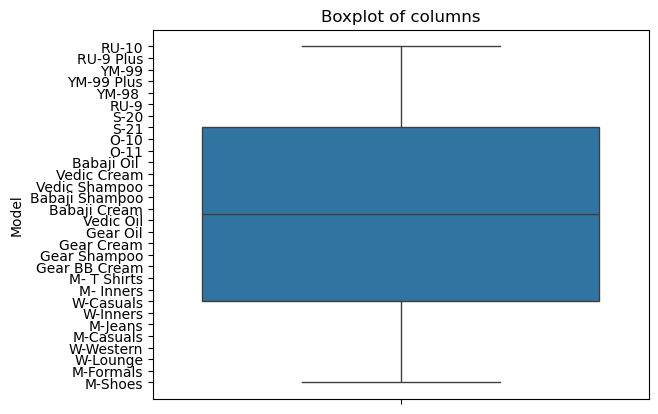

Avg Price


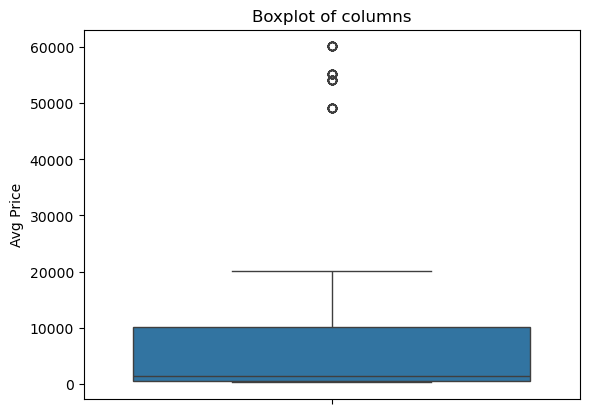

Total Sales Value


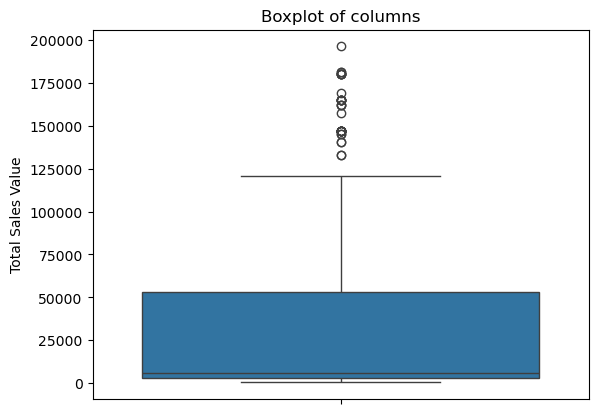

Discount Rate (%)


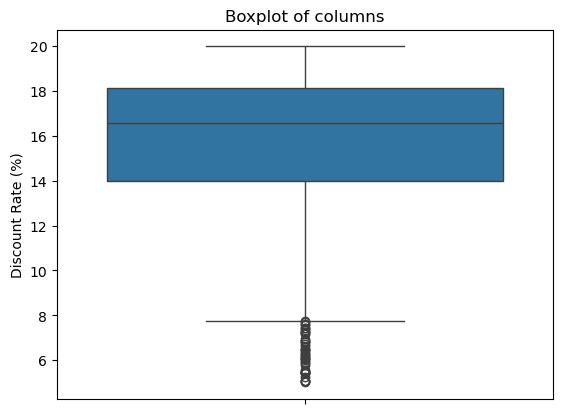

Discount Amount


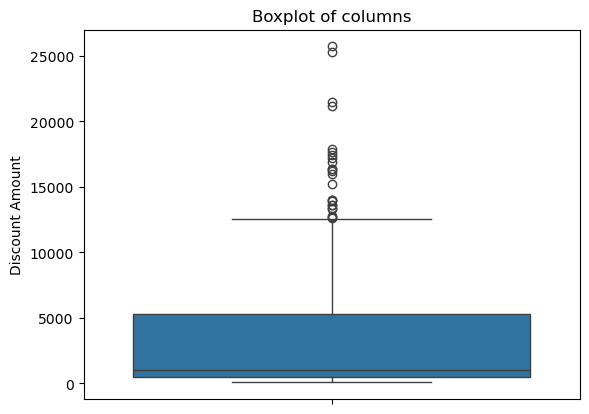

Net Sales Value


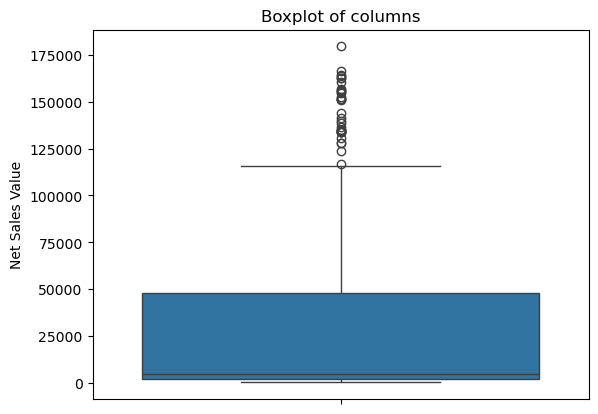

In [7]:
for i in ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value']:
    print(i)
    sns.boxplot(df[i])
    plt.title('Boxplot of columns')
    plt.show()

●	Histograms for each numerical column.


Date


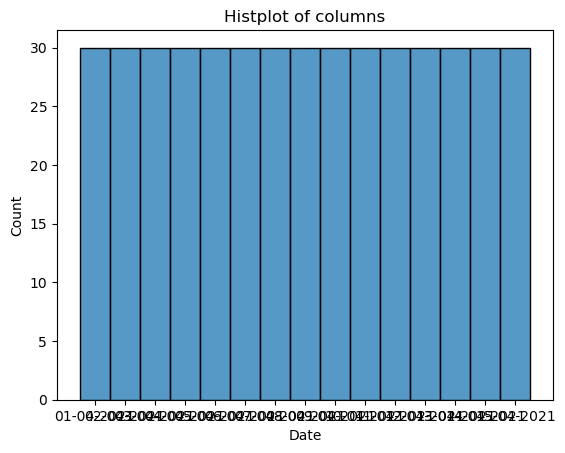

Day


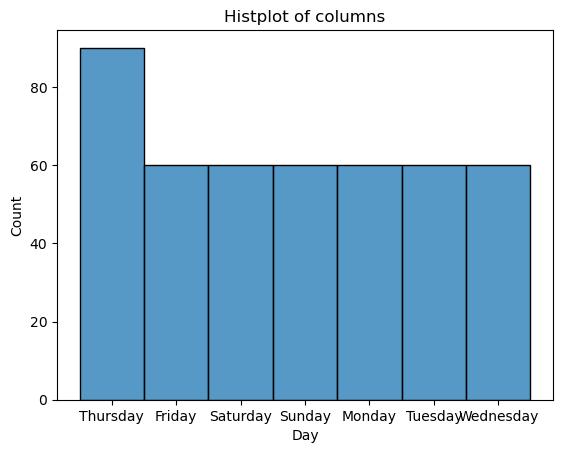

SKU


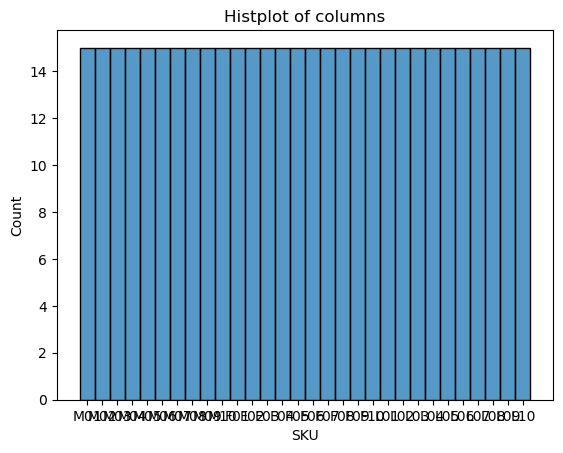

City


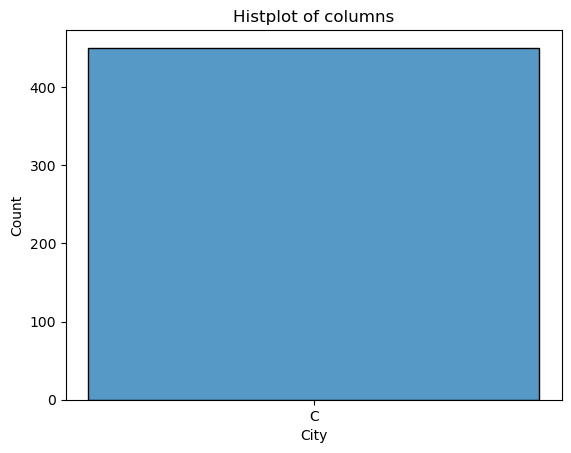

Volume


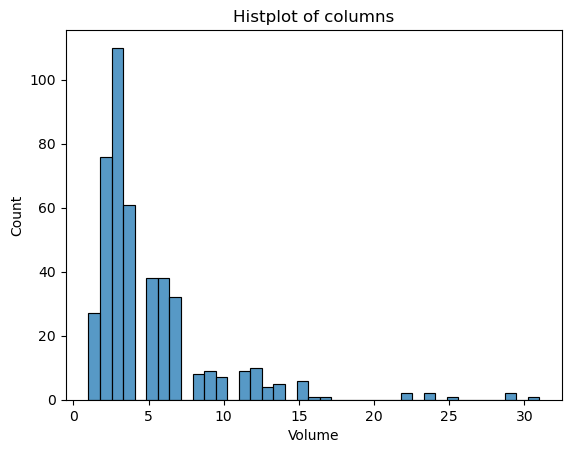

BU


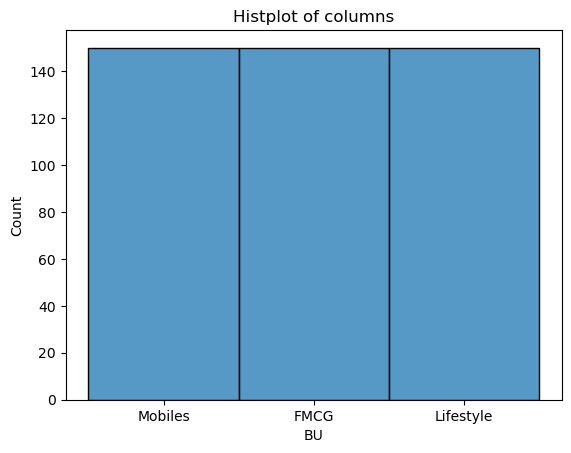

Brand


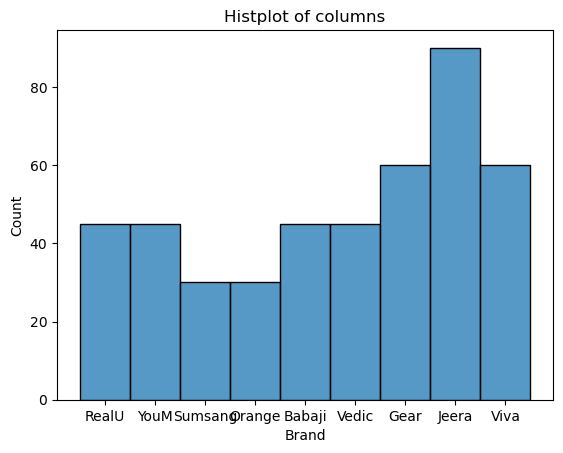

Model


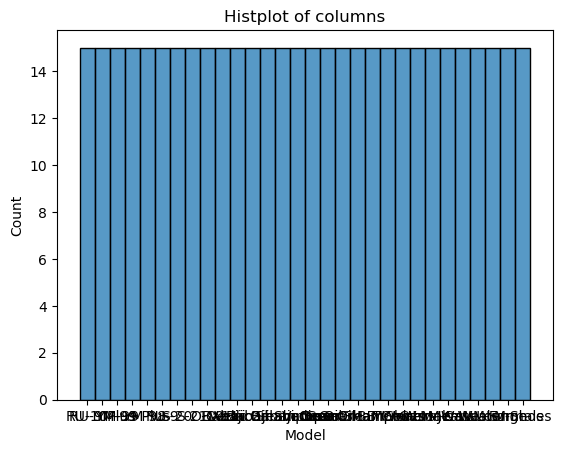

Avg Price


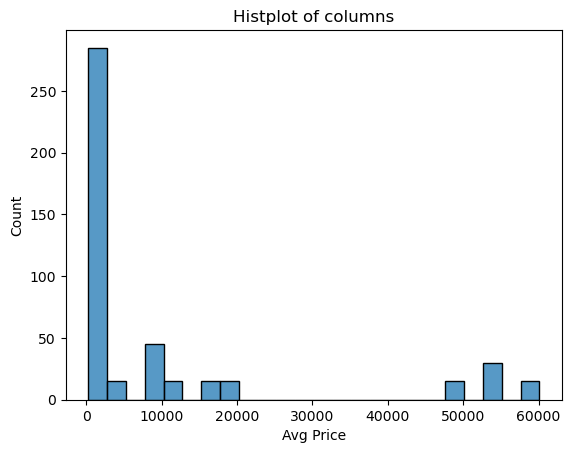

Total Sales Value


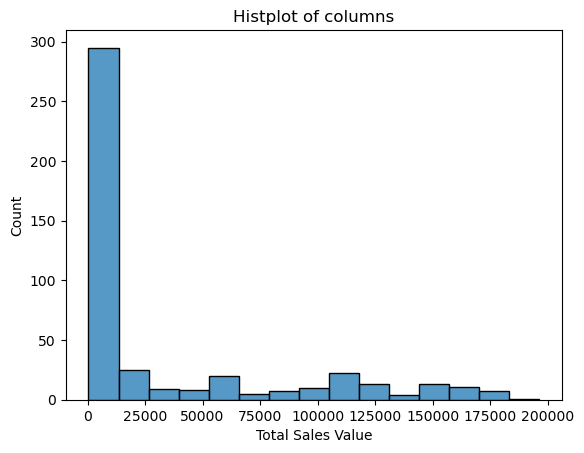

Discount Rate (%)


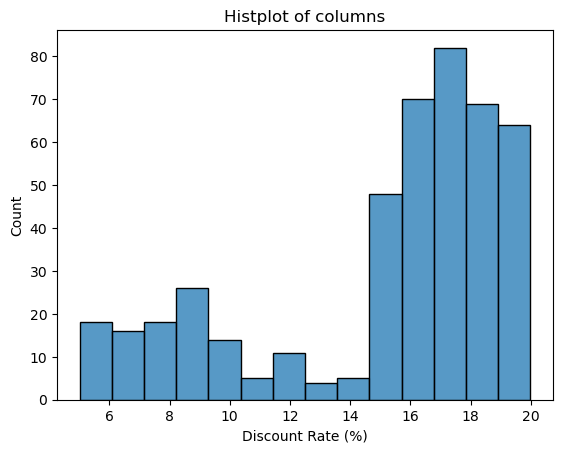

Discount Amount


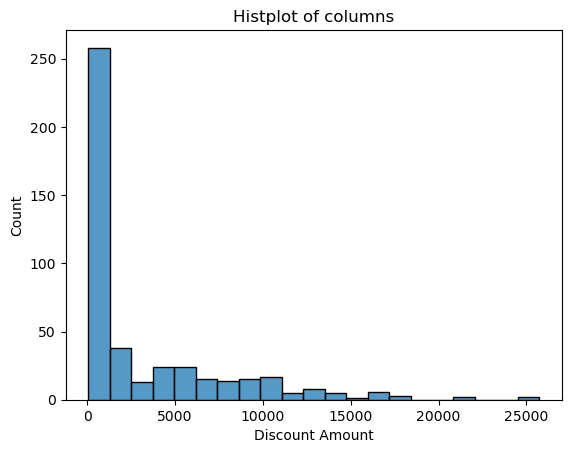

Net Sales Value


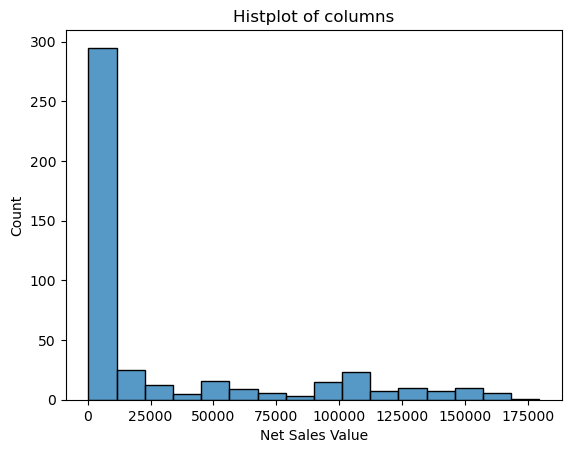

In [8]:
for i in ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value']:
    print(i)
    sns.histplot(df[i])
    plt.title('Histplot of columns')
    plt.show()

In [9]:
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
print('Categorical columns:',categorical_cols)

Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


●	Bar Chart Analysis for Categorical Column


C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3159315058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3159315058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3159315058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='past

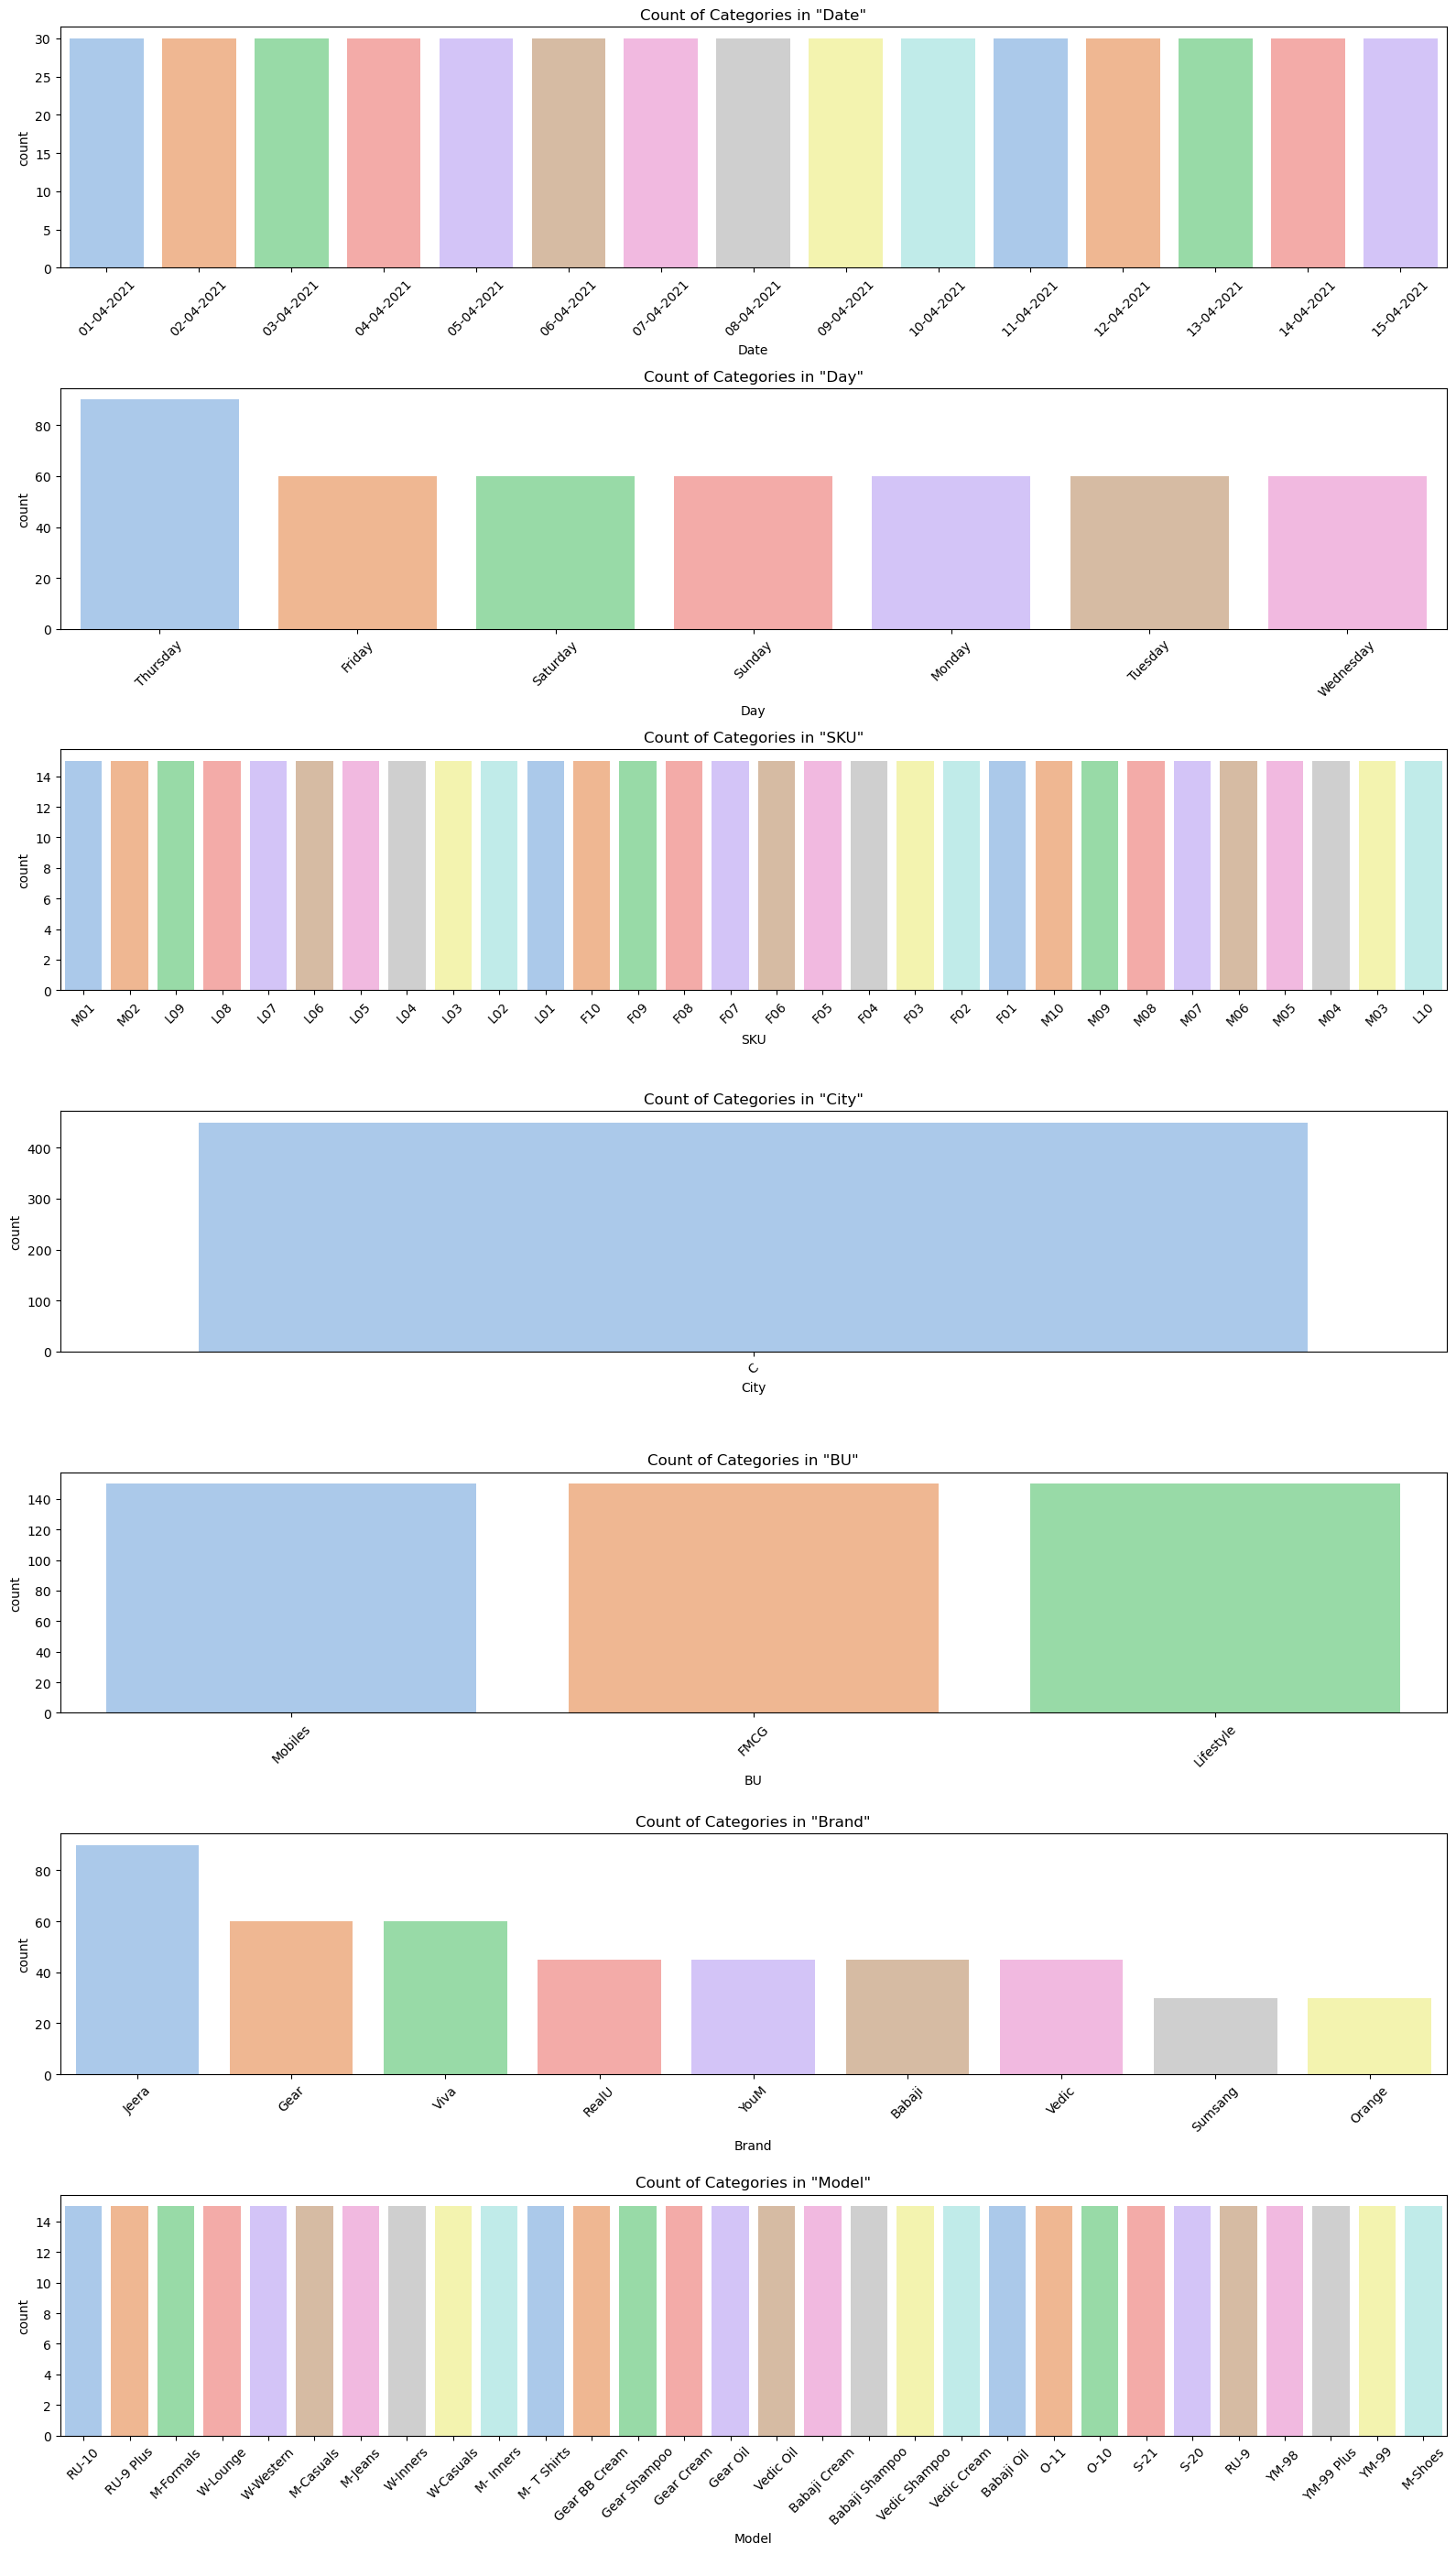

In [10]:
plt.figure(figsize=(16, len(categorical_cols) * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Count of Categories in "{col}"')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

<div style="text-align: left; font-size: 25px; color: red;">
    <u><b>STANDADIZATION OF NUMERICAL VARIABLES</b></u>
</div>

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
before_std=df[numerical_cols].copy()

In [13]:
scaler=StandardScaler()

In [14]:
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [15]:
after_std=df[numerical_cols].copy()

In [16]:
print('Before standadization:\n',before_std.head())

Before standadization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [17]:
print('After standadization:\n',after_std.head())

After standadization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [18]:
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=False)

In [19]:
print(df_encoded.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.804756             True            False            False   
1         1.271026             True            False            False   
2         1.545675             True            False            False   
3         1.765810             True            False            False   
4        -0.227595             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          

<div style="text-align: left; font-size: 18px; color: Green;">
    <u><b>CONCLUSION</b></u><br>
<p> <b>Key Findings from Descriptive Analytics and Visualizations:
Volume & Sales</b>

The average volume sold per entry is around 5 units, but ranges from 1 to 31, indicating variation in order size.

Total Sales Value and Net Sales Value are highly skewed, with a few entries having very high values (up to ~196,000 AED).

Price & Discount Insights:

The average price of items is around 10,453 AED, but there are significant outliers (up to 60,100 AED).

Discount rates vary between 5% and ~20%, with a mean of ~15%.

A higher discount amount corresponds to higher-priced items, which is visible in both boxplots and histograms.

Categorical Trends:

countplot visualizations showed frequency patterns in categories such as City, Brand, and Model.

Certain models and brands dominate the sales dataset, indicating non-uniform distribution in categorical data.

<b>Importance of Data Preprocessing</b>
Standardization:

Numerical features like Volume, Avg Price, and Net Sales Value were standardized using StandardScaler, which:

Removes units and scales all features to have mean 0 and standard deviation 1.

Helps many machine learning algorithms (e.g., KNN, SVM, Logistic Regression) perform better by treating all features equally.

One-Hot Encoding:

Categorical variables (Brand, City, Model, etc.) were transformed into binary (0/1) features.

This is crucial because most ML models cannot interpret non-numeric values.

Using pd.get_dummies() ensured all categories were properly encoded for modeling.

<b>Final Summary</b>
The analysis highlighted significant variation in sales, pricing, and discounting strategies across different products and cities. Proper visualization helped uncover distribution patterns and potential outliers. Meanwhile, preprocessing techniques like standardization and one-hot encoding prepared the data for effective modeling by ensuring consistent numerical scales and converting categories into usable formats. These steps are essential for building reliable and interpretable machine learning models.
</p>
    
</div>